### Machine Learning- Linear Regression on the Boston Housing Dataset

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics

In [2]:
Boston = pd.read_csv('Housingdata.csv')

In [3]:
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
#Number of rows and columns
Boston.shape

(506, 14)

In [4]:
#Checking to see if the data is clean
Boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
#Rechecking to see if there are empty columns
Boston=Boston.dropna()
Boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

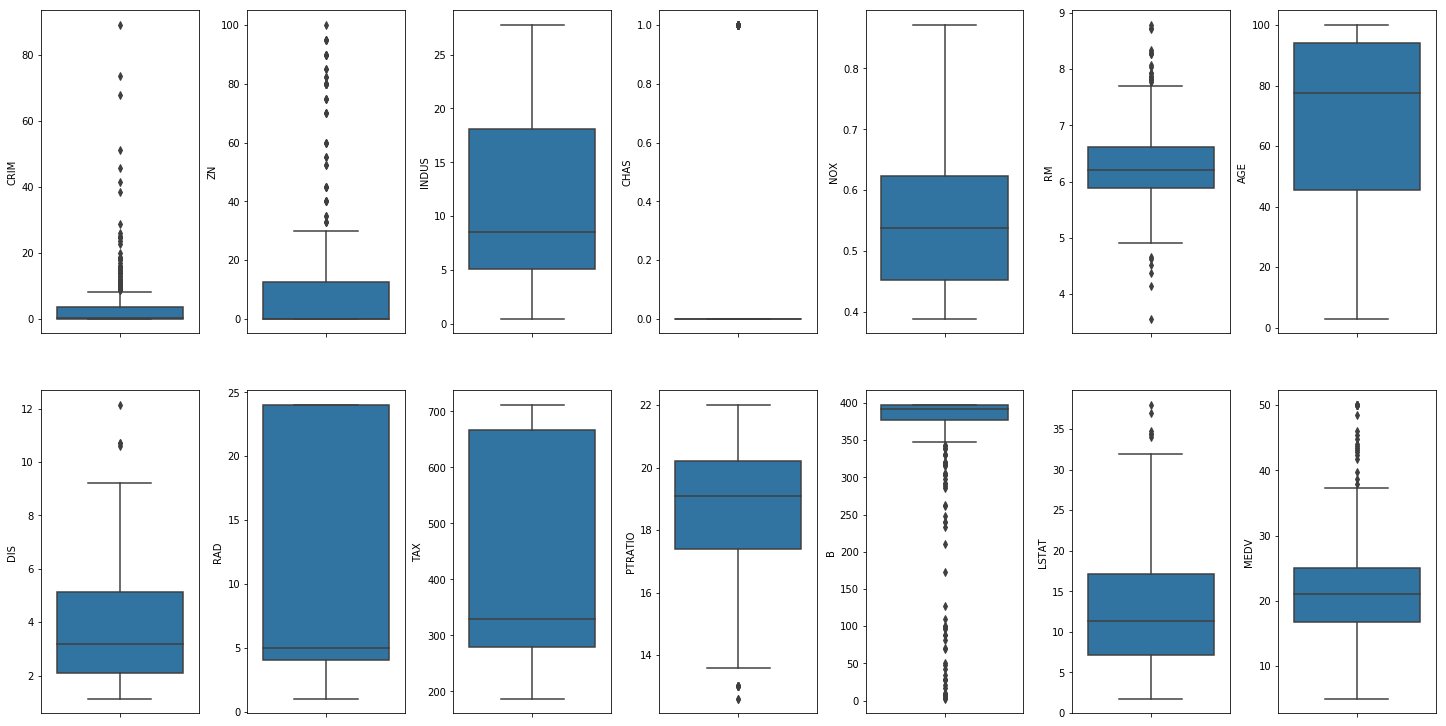

In [6]:
#Exploratory Data Analysis(EDA) on the given dataset to see if there are outliers in the variables
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Boston.items():
    sns.boxplot(y=k, data=Boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [12]:
#Converting into object to apply the scaler
le=LabelEncoder()

for col in Boston.columns.values:
       if Boston[col].dtypes=='object':
        data=Boston[col].append(Boston[col])
        le.fit(data.values)
        Boston[col]=le.transform(Boston[col])

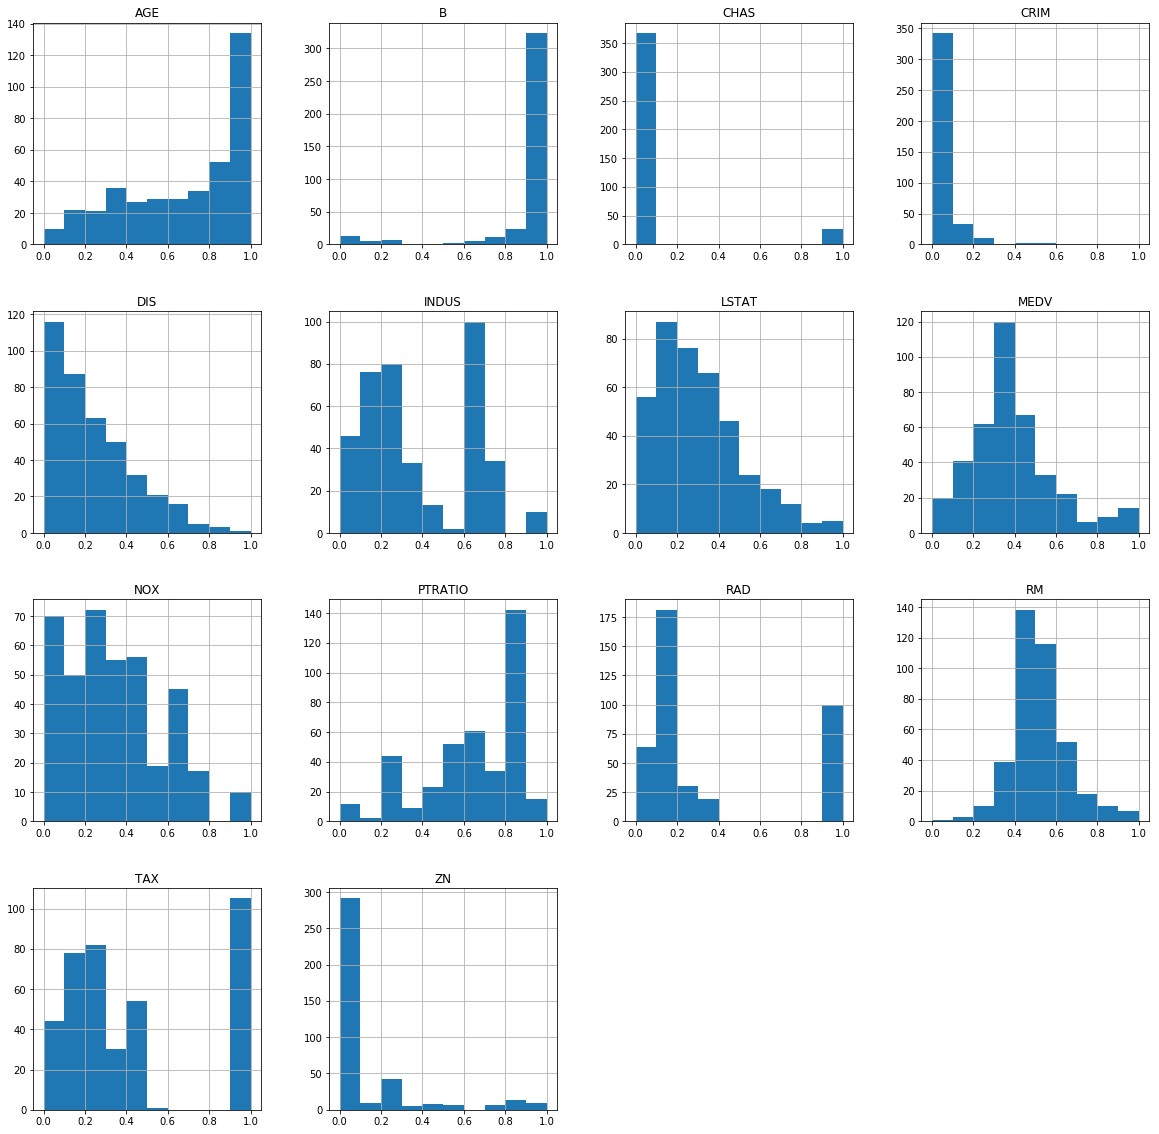

In [12]:
#Applying scaling transformation        
minmax_scale =preprocessing.MinMaxScaler().fit(Boston)
df_minmax =minmax_scale.transform(Boston)
df_minmax = pd.DataFrame(df_minmax, columns=list(Boston))
df_minmax.hist(figsize=(20,20))
plt.show()

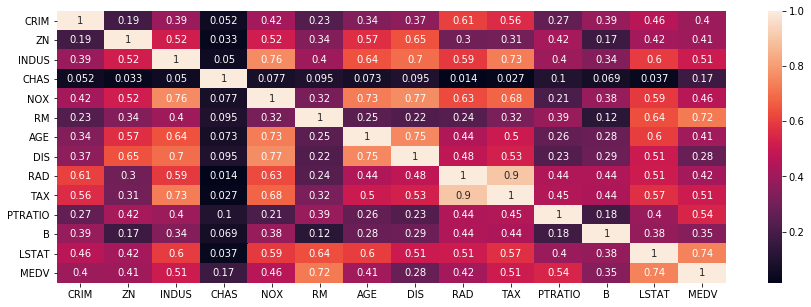

In [13]:
#Creating a correlation heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(Boston.corr().abs(),  annot=True)

In [19]:
#Based on the matrix above  I short-listed RM and LSTAT based on the correlation to MEDV
features = ['LSTAT', 'RM']
target = Boston['MEDV']

### ◦ Training a linear regression model

In [20]:
# creating a model with 2 features
lm = smf.ols(formula='MEDV ~LSTAT + RM', data=Boston).fit()

# print the coefficients
lm.params

Intercept   -4.731820
LSTAT       -0.594497
RM           5.522704
dtype: float64

In [21]:
#Using the RMSE to evaluate the model
X = Boston[['LSTAT', 'RM']]
y = Boston.MEDV

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5.76380396647917
